In [188]:
# For data handling
import os
import pandas as pd
import numpy as np
import sys

# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [189]:
data_folder = "../data"

# Load individual season data
wnba_2022 = pd.read_csv(os.path.join(data_folder, "wnba_2022.csv"))
wnba_2023 = pd.read_csv(os.path.join(data_folder, "wnba_2023.csv"))
wnba_2024 = pd.read_csv(os.path.join(data_folder, "wnba_2024.csv"))

# Combine all seasons into one dataset
wnba_data = pd.concat([wnba_2022, wnba_2023, wnba_2024], ignore_index=True)

# Add a year column for Time Actual that's in format ISO8601
wnba_data['timeActual'] = pd.to_datetime(wnba_data['timeActual'], format='ISO8601')
# Ensure 'timeActual' is in datetime format
wnba_data['year'] = wnba_data['timeActual'].dt.year

 
# Display basic information about the dataset
print(f"Total records across all seasons: {len(wnba_data):,}")
print(f"Columns in dataset: {wnba_data.shape[1]}")
print(f"Dataset shape: {wnba_data.shape}")
print("\nDataset columns:")
print(wnba_data.columns.tolist())


Total records across all seasons: 28,103
Columns in dataset: 58
Dataset shape: (28103, 58)

Dataset columns:
['actionNumber', 'clock', 'timeActual', 'period', 'periodType', 'actionType', 'subType', 'qualifiers', 'personId', 'x', 'y', 'possession', 'scoreHome', 'scoreAway', 'edited', 'orderNumber', 'xLegacy', 'yLegacy', 'isFieldGoal', 'side', 'description', 'personIdsFilter', 'teamId', 'teamTricode', 'descriptor', 'jumpBallRecoveredName', 'jumpBallRecoverdPersonId', 'playerName', 'playerNameI', 'jumpBallWonPlayerName', 'jumpBallWonPersonId', 'jumpBallLostPlayerName', 'jumpBallLostPersonId', 'shotDistance', 'shotResult', 'shotActionNumber', 'reboundTotal', 'reboundDefensiveTotal', 'reboundOffensiveTotal', 'pointsTotal', 'assistPlayerNameInitial', 'assistPersonId', 'assistTotal', 'turnoverTotal', 'stealPlayerName', 'stealPersonId', 'officialId', 'foulPersonalTotal', 'foulTechnicalTotal', 'foulDrawnPlayerName', 'foulDrawnPersonId', 'blockPlayerName', 'blockPersonId', 'gameId', 'isTargetSco


1. Summary of the Game Data:
Number of games: 65
Date range: August 2022 to October 2024
Number of teams: 11
Teams: ['ATL', 'CHI', 'CON', 'DAL', 'IND', 'LVA', 'MIN', 'NYL', 'PHO', 'SEA', 'WAS']

2. Summary of the Referee Assignments:
Games with referee data: 65 out of 65 total games (100.0%)
Records with referee data: 2,793 (9.9%)
Unique referees: 27
Average referees per game: 3.05

Top 10 Most Active Referees (by unique games):
officialId
100697.0     20
201538.0     20
100274.0     19
203440.0     18
202297.0     17
203800.0     16
1628702.0    14
203891.0      8
101044.0      8
1628167.0     8
Name: gameId, dtype: int64


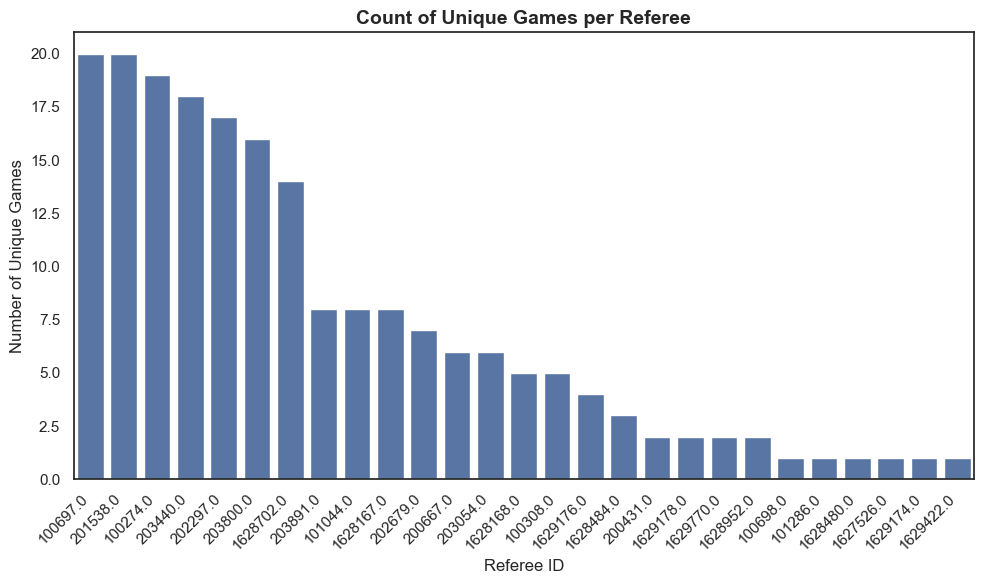


Outcomes by Season:
2022: 23 games, 12 home wins , average point difference: 5
2023: 20 games, 13 home wins , average point difference: 9
2024: 22 games, 17 home wins , average point difference: 6

Missing Values Analysis:
              total_count  referee_count  percent_missing
actionType                                               
2pt                  6022            0.0            100.0
3pt                  2940            0.0            100.0
block                 566            0.0            100.0
freethrow            2044            0.0            100.0
game                   65            0.0            100.0
jumpball              191            0.0            100.0
substitution         5070            0.0            100.0
period                528            0.0            100.0
rebound              5416            0.0            100.0
steal                 876            0.0            100.0
timeout               664            0.0            100.0
turnover             1

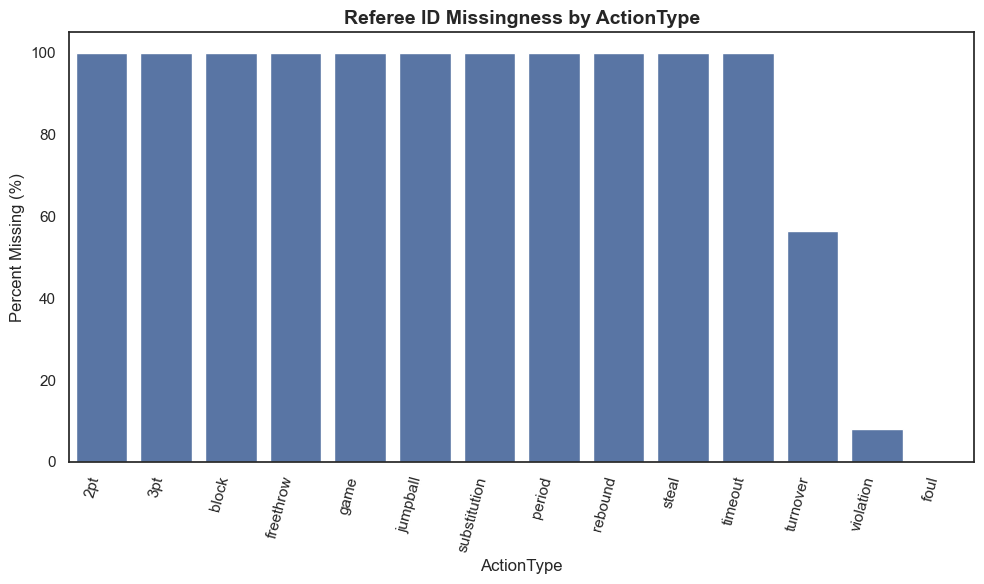


Missing Referee ID Values for Turnover Subtypes:
                       total_count  referee_count  percent_missing
subType                                                           
bad pass                       582            0.0            100.0
jumpball violation               2            0.0            100.0
offensive-kicked-ball            1            0.0            100.0
lost ball                      305            4.0             98.7
3-second-violation              17           14.0             17.6
backcourt                        9            8.0             11.1
shot clock                     129          115.0             10.9
out-of-bounds                  337          322.0              4.5
traveling                       96           95.0              1.0
5-second-violation               2            2.0              0.0
double dribble                   2            2.0              0.0
8-second-violation               2            2.0              0.0
offensive fo

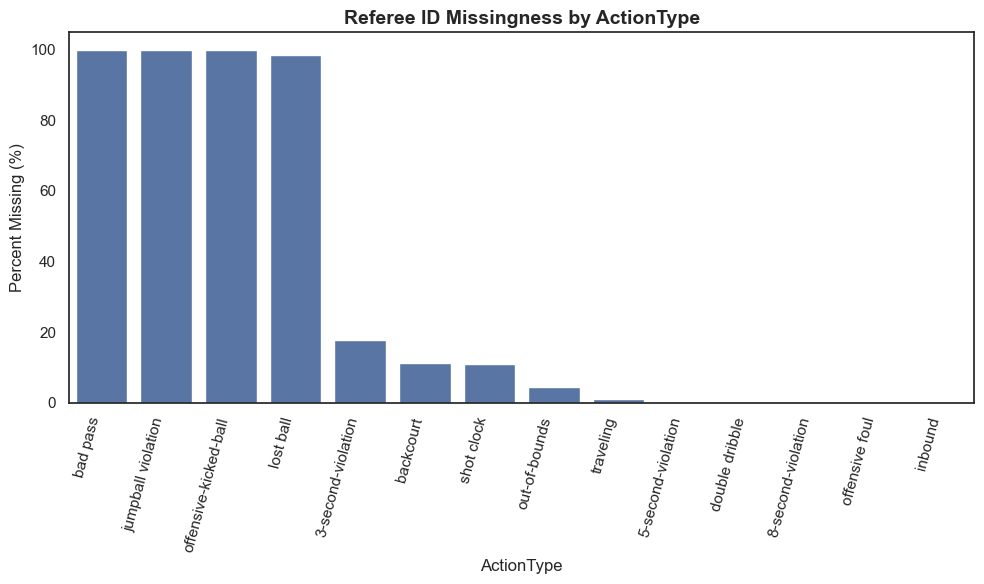

In [ ]:

# --------------------  Game Metadata Analysis
print("\n1. Summary of the Game Data:")
print(f"Number of games: {wnba_data['gameId'].nunique()}")
# Convert timeActual to datetime with proper format handling
wnba_data['timeActual'] = pd.to_datetime(wnba_data['timeActual'], format='ISO8601')
min_date = wnba_data['timeActual'].min().strftime('%B %Y')
max_date = wnba_data['timeActual'].max().strftime('%B %Y')

print(f"Date range: {min_date} to {max_date}")
print(f"Number of teams: {wnba_data['teamTricode'].nunique()}")
print("Teams:", sorted(wnba_data['teamTricode'].dropna().unique()))


#-------------------- Referee Assignment Analysis  
print("\n2. Summary of the Referee Assignments:")
referee_data = wnba_data[wnba_data['officialId'].notnull()]

# Calculate the count of how many games have referee data
games_with_referee_data = referee_data['gameId'].nunique()
total_games = wnba_data['gameId'].nunique()

print(f"Games with referee data: {games_with_referee_data} out of {total_games} total games ({games_with_referee_data/total_games*100:.1f}%)")
print(f"Records with referee data: {len(referee_data):,} ({len(referee_data)/len(wnba_data)*100:.1f}%)")
print(f"Unique referees: {referee_data['officialId'].nunique()}")

# Referee assignments per game
referee_assignments = referee_data.groupby('gameId')['officialId'].nunique().reset_index()
referee_assignments.columns = ['gameId', 'num_referees']
print(f"Average referees per game: {referee_assignments['num_referees'].mean():.2f}")


# Most active referees based on unique gameids
top_referees = referee_data.groupby('officialId')['gameId'].nunique().sort_values(ascending=False).head(10)
print(f"\nTop 10 Most Active Referees (by unique games):")
print(top_referees)

# Visualize of all referees by number of unique games

all_referees = referee_data.groupby('officialId')['gameId'].nunique().sort_values(ascending=False)
all_referees.index = all_referees.index.astype(str)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=all_referees.index, 
    y=all_referees.values
)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Unique Games per Referee', fontsize=14, fontweight='bold')
plt.xlabel('Referee ID')
plt.ylabel('Number of Unique Games')
plt.tight_layout()
plt.show()


# -------------------- Game Outcomes Analysis

games_summary = wnba_data.groupby('gameId').agg({
    'scoreHome': 'max',
    'scoreAway': 'max',
    'teamTricode': 'nunique',
    'year': 'first'
}).reset_index()

games_summary['point_differential'] = games_summary['scoreHome'] - games_summary['scoreAway']
games_summary['home_win'] = games_summary['point_differential'] > 0

# Analyzing by year the game outcomes
yearly_outcomes = games_summary.groupby('year').agg({
    'gameId': 'count',
    'home_win': ['sum', 'mean'],
    'point_differential': 'mean'
}).round(0)

print("\nOutcomes by Season:")
for year in yearly_outcomes.index:
    games_count = yearly_outcomes.loc[year, ('gameId', 'count')]
    home_wins = yearly_outcomes.loc[year, ('home_win', 'sum')]
    home_win_pct = yearly_outcomes.loc[year, ('home_win', 'mean')] * 100
    avg_diff = yearly_outcomes.loc[year, ('point_differential', 'mean')]
    
    print(f"{int(year)}: {int(games_count)} games, {int(home_wins)} home wins , average point difference: {int(avg_diff)}")

#-------------------- Missing Values Analysis
print("\nMissing Values Analysis:")

# Summarize the missing vaules for referee actions

# Key variables for referee analysis
key_variables = ['gameId', 'officialId', 'teamTricode', 'foulPersonalTotal', 
                'scoreHome', 'scoreAway', 'timeActual', 'period']

# Missing values within actionType calls 
actiontype_total = wnba_data.groupby('actionType')['officialId'].size().reset_index(name='total_count')
actiontype_with_ref = wnba_data[wnba_data['officialId'].notnull()].groupby('actionType')['officialId'].count().reset_index(name='referee_count')
actiontype_counts = pd.merge(actiontype_total, actiontype_with_ref, on='actionType', how='left').fillna(0)
actiontype_counts['percent_missing'] = ((actiontype_counts['total_count'] - actiontype_counts['referee_count']) / actiontype_counts['total_count'] * 100).round(1)
actiontype_counts = actiontype_counts.sort_values('percent_missing', ascending=False).set_index('actionType')
print(actiontype_counts[['total_count', 'referee_count', 'percent_missing']])

# Visualize missing values
plt.figure(figsize=(10,6))
sns.barplot(
    x=actiontype_counts.index, 
    y=actiontype_counts['percent_missing'])
plt.xticks(rotation=75, ha='right')
plt.title('Referee ID Missingness by ActionType', fontsize=14, fontweight='bold')
plt.xlabel('ActionType')
plt.ylabel('Percent Missing (%)')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

# Visualize missing referee ID values for different subtypes within actionType = 'Turnover'
turnover_data = wnba_data[wnba_data['actionType'] == 'turnover']

subtype_total = turnover_data.groupby('subType')['officialId'].size().reset_index(name='total_count')
subtype_with_ref = turnover_data[turnover_data['officialId'].notnull()].groupby('subType')['officialId'].count().reset_index(name='referee_count')
subtype_counts = pd.merge(subtype_total, subtype_with_ref, on='subType', how='left').fillna(0)
subtype_counts['percent_missing'] = ((subtype_counts['total_count'] - subtype_counts['referee_count']) / subtype_counts['total_count'] * 100).round(1)
subtype_counts = subtype_counts.sort_values('percent_missing', ascending=False).set_index('subType')
print("\nMissing Referee ID Values for Turnover Subtypes:")
print(subtype_counts[['total_count', 'referee_count', 'percent_missing']]) 

# Visualize missing values
plt.figure(figsize=(10,6))
sns.barplot(
    x=subtype_counts.index, 
    y=subtype_counts['percent_missing'])
plt.xticks(rotation=75, ha='right')
plt.title('Referee ID Missingness by ActionType', fontsize=14, fontweight='bold')
plt.xlabel('ActionType')
plt.ylabel('Percent Missing (%)')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()




In [262]:
####  Data Cleaning and Preparation for Referee-level event counts from raw play-by-play

# Build home/away mapping
wnba_data = wnba_data.copy()
wnba_data['scoreHome_num'] = pd.to_numeric(wnba_data.get('scoreHome'), errors='coerce')
wnba_data['scoreAway_num'] = pd.to_numeric(wnba_data.get('scoreAway'), errors='coerce')
wnba_data = wnba_data.sort_values(['gameId','period','timeActual'], kind='mergesort')

wnba_data['home_diff'] = wnba_data.groupby('gameId')['scoreHome_num'].diff()
wnba_data['away_diff'] = wnba_data.groupby('gameId')['scoreAway_num'].diff()

first_home = (
    wnba_data[wnba_data['home_diff'] > 0]
    .groupby('gameId', as_index=False)
    .agg(home_tricode=('teamTricode','first'))
)
first_away = (
    wnba_data[wnba_data['away_diff'] > 0]
    .groupby('gameId', as_index=False)
    .agg(away_tricode=('teamTricode','first'))
)
ha_map = pd.merge(first_home, first_away, on='gameId', how='outer')

df = wnba_data.merge(ha_map, on='gameId', how='left')
df['is_home'] = (df['teamTricode'] == df['home_tricode']).astype(int)
df['is_away'] = (df['teamTricode'] == df['away_tricode']).astype(int)
df['away_game'] = (df['is_away'] == 1).astype(int)

# Referee-level event table
ref_events = wnba_data[wnba_data['officialId'].notna()].copy()

#-- assign each unique referee ID a unique alphabet label 
def ref_label(idx):
    return f"Ref {chr(65 + idx)}"

# Mapping from officialId based on sorted unique IDs
unique_ref_ids = sorted(ref_events['officialId'].dropna().unique())
ref_id_to_label = {ref_id: ref_label(i) for i, ref_id in enumerate(unique_ref_ids)}

for col in ['actionType', 'subType', 'teamTricode']:
    if col in ref_events.columns:
        ref_events[col] = ref_events[col].astype(str).str.strip().str.lower().replace({'nan': np.nan})

ref_events['teamTricode'] = ref_events['teamTricode'].fillna('unknown')

home_away_map = df[['gameId','teamTricode','is_home','is_away','away_game']].drop_duplicates()
ref_events = ref_events.merge(home_away_map, on=['gameId','teamTricode'], how='left')

ref_events['team_status'] = np.where(ref_events['is_home'] == 1, 'home',
                            np.where(ref_events['is_away'] == 1, 'away', 'unknown'))

# --- Assign global ref_label ---
ref_events['ref_label'] = ref_events['officialId'].map(ref_id_to_label)

# --- Base counts per (game, ref, teamTricode, team_status)
ref_event_counts = (ref_events.groupby(['gameId','officialId','ref_label','teamTricode','team_status'])
    .agg(fouls_made=('actionType', lambda x: (x == 'foul').sum()),
        turnovers_made=('actionType', lambda x: (x == 'turnover').sum())    )
    .reset_index())

# --- Per-subtype counts (pivot wide by subtype) — include team_status in keys
subtype_counts = (ref_events.groupby(['gameId','officialId','ref_label','teamTricode','team_status','subType'])
    .size()
    .unstack(fill_value=0)
    .reset_index())

key_cols = ['gameId','officialId','ref_label','teamTricode','team_status']
sub_cols = [c for c in subtype_counts.columns if c not in key_cols]
subtype_counts = subtype_counts.rename(columns={c: f"st_{str(c)}" for c in sub_cols})

referee_game_data = ref_event_counts.merge(
    subtype_counts,
    on=['gameId','officialId','ref_label','teamTricode','team_status'],
    how='left')

count_cols = ['fouls_made','turnovers_made'] + [c for c in referee_game_data.columns if c.startswith('st_')]
referee_game_data[count_cols] = referee_game_data[count_cols].fillna(0).astype(int)

print(f"\nReferee-game dataset shape: {referee_game_data.shape}")
print(f"Unique referees: {referee_game_data['officialId'].nunique()}")
print(f"Referee-game records: {len(referee_game_data)}")

sample_cols = ['gameId','officialId','ref_label','teamTricode','team_status','fouls_made','turnovers_made']
if 'st_traveling' in referee_game_data.columns:
    sample_cols.append('st_traveling')
print("\nSample of Referee-game dataset:")
print(referee_game_data[sample_cols].head(5))


# Print the referee mapping
print("\nReferee ID to Label Mapping:")
for ref_id, label in ref_id_to_label.items():
    print(f"{ref_id}: {label}")




Referee-game dataset shape: (394, 24)
Unique referees: 27
Referee-game records: 394

Sample of Referee-game dataset:
       gameId  officialId ref_label teamTricode team_status  fouls_made  \
0  1042200101    100274.0     Ref A         lva        home           5   
1  1042200101    100274.0     Ref A         pho        away           3   
2  1042200101    101044.0     Ref E         lva        home           7   
3  1042200101    101044.0     Ref E         pho        away           7   
4  1042200101   1628167.0     Ref Q         lva        home           6   

   turnovers_made  st_traveling  
0               3             1  
1               1             0  
2               4             0  
3               2             0  
4               2             0  

Referee ID to Label Mapping:
100274.0: Ref A
100308.0: Ref B
100697.0: Ref C
100698.0: Ref D
101044.0: Ref E
101286.0: Ref F
200431.0: Ref G
200667.0: Ref H
201538.0: Ref I
202297.0: Ref J
202679.0: Ref K
203054.0: Ref L
20344

In [ ]:
import os
import pandas as pd
import numpy as np

# --- normalize text fields
for c in ['actionType','subType','teamTricode']:
    if c in wnba_data.columns:
        wnba_data[c] = wnba_data[c].astype(str).str.lower().replace('nan', np.nan)

# --- coerce scores to numeric
wnba_data['scoreHome_num'] = pd.to_numeric(wnba_data['scoreHome'], errors='coerce')
wnba_data['scoreAway_num'] = pd.to_numeric(wnba_data['scoreAway'], errors='coerce')

# --- sort for correct order
wnba_data = wnba_data.sort_values(['gameId','period','timeActual'], kind='mergesort')

# --- detect scoreboard increments
wnba_data['home_diff'] = wnba_data.groupby('gameId')['scoreHome_num'].diff()
wnba_data['away_diff'] = wnba_data.groupby('gameId')['scoreAway_num'].diff()

# --- first scoring teams = home/away
first_home = (
    wnba_data[wnba_data['home_diff'] > 0]
    .groupby('gameId', as_index=False)
    .agg(home_tricode=('teamTricode','first'))
)
first_away = (
    wnba_data[wnba_data['away_diff'] > 0]
    .groupby('gameId', as_index=False)
    .agg(away_tricode=('teamTricode','first'))
)
ha_map = pd.merge(first_home, first_away, on='gameId', how='outer')

# --- merge mapping back
df = wnba_data.merge(ha_map, on='gameId', how='left')
df['is_home'] = (df['teamTricode'] == df['home_tricode']).astype(int)
df['is_away'] = (df['teamTricode'] == df['away_tricode']).astype(int)

# --- turnover types that involve whistles
turnover_keep = {
    '3-second-violation','backcourt','shot clock','out-of-bounds',
    'traveling','5-second-violation','double dribble','8-second-violation',
    'offensive foul','inbound'
}

# --- keep fouls + selected turnovers
mask_foul = df['actionType'] == 'foul'
mask_to   = (df['actionType'] == 'turnover') & df['subType'].isin(turnover_keep)
df = df[mask_foul | mask_to].copy()

# --- basic foul + turnover counts
df['foul_count'] = (df['actionType'] == 'foul').astype(int)
df['turnover_whistle'] = (df['actionType'] == 'turnover').astype(int)

# --- split by home/away
df['foul_count_home'] = df['foul_count'] * df['is_home']
df['foul_count_away'] = df['foul_count'] * df['is_away']
df['turnover_whistle_home'] = df['turnover_whistle'] * df['is_home']
df['turnover_whistle_away'] = df['turnover_whistle'] * df['is_away']


# GLOBAL REF LABEL MAPPING

unique_ref_ids = sorted(df['officialId'].dropna().unique())
ref_id_to_label = {ref_id: f"Ref {chr(65+i)}" for i, ref_id in enumerate(unique_ref_ids)}

# Per-game crew label string using global mapping
def crew_label_str(official_ids):
    ids = [oid for oid in sorted(set(official_ids)) if pd.notna(oid)]
    return ', '.join([ref_id_to_label[oid] for oid in ids])

crew_map = (
    df.groupby('gameId')['officialId']
      .apply(lambda s: sorted(set(s.dropna())))
      .reset_index(name='official_ids')
)
crew_map['crew_combo'] = crew_map['official_ids'].apply(crew_label_str)
crew_map = crew_map[['gameId','crew_combo']]

# Attach each event’s ref_label using the global mapping
df['ref_label'] = df['officialId'].map(ref_id_to_label)

# INDIVIDUAL (per ref per game) aggregates
referee_game_data = (
    df.groupby(['gameId','officialId','ref_label','teamTricode'])
      .agg(
          fouls_made=('foul_count','sum'),
          turnovers_made=('turnover_whistle','sum'),
          fouls_home=('foul_count_home','sum'),
          fouls_away=('foul_count_away','sum'),
          to_home=('turnover_whistle_home','sum'),
          to_away=('turnover_whistle_away','sum')
      )
      .reset_index()
)

# CREW (per game) aggregates

games_with_refs = (
    df.groupby('gameId')
      .agg(
          official_crew=('officialId', lambda x: sorted(set(x.dropna()))),
          foul_count=('foul_count','sum'),
          foul_count_home=('foul_count_home','sum'),
          foul_count_away=('foul_count_away','sum'),
          turnover_whistle=('turnover_whistle','sum'),
          turnover_whistle_home=('turnover_whistle_home','sum'),
          turnover_whistle_away=('turnover_whistle_away','sum'),
          scoreHome=('scoreHome_num','max'),
          scoreAway=('scoreAway_num','max')
      )
      .reset_index()
)

# Apply the global crew label string
games_with_refs = games_with_refs.merge(crew_map, on='gameId', how='left')
games_with_refs['crew_size'] = games_with_refs['official_crew'].apply(lambda ids: len(set(ids)))
games_with_refs['point_diff_home'] = games_with_refs['scoreHome'] - games_with_refs['scoreAway']
games_with_refs['home_win'] = (games_with_refs['point_diff_home'] > 0).astype(int)
games_with_refs['away_game'] = (games_with_refs['home_win'] == 0).astype(int)

games_with_refs.to_csv(os.path.join(data_folder, 'games_with_refs.csv'), index=False)


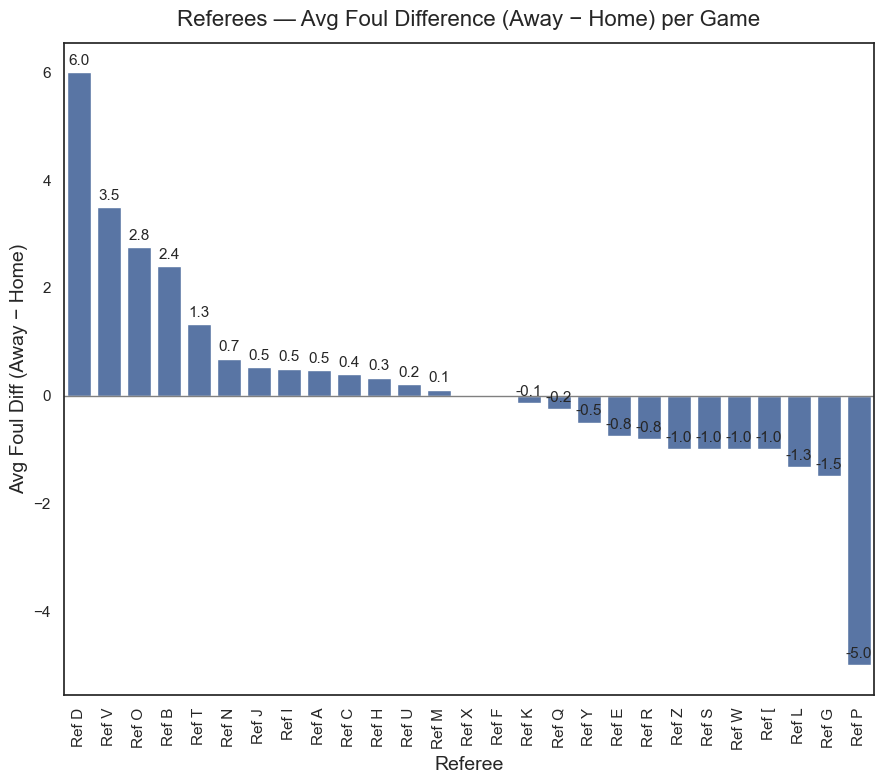

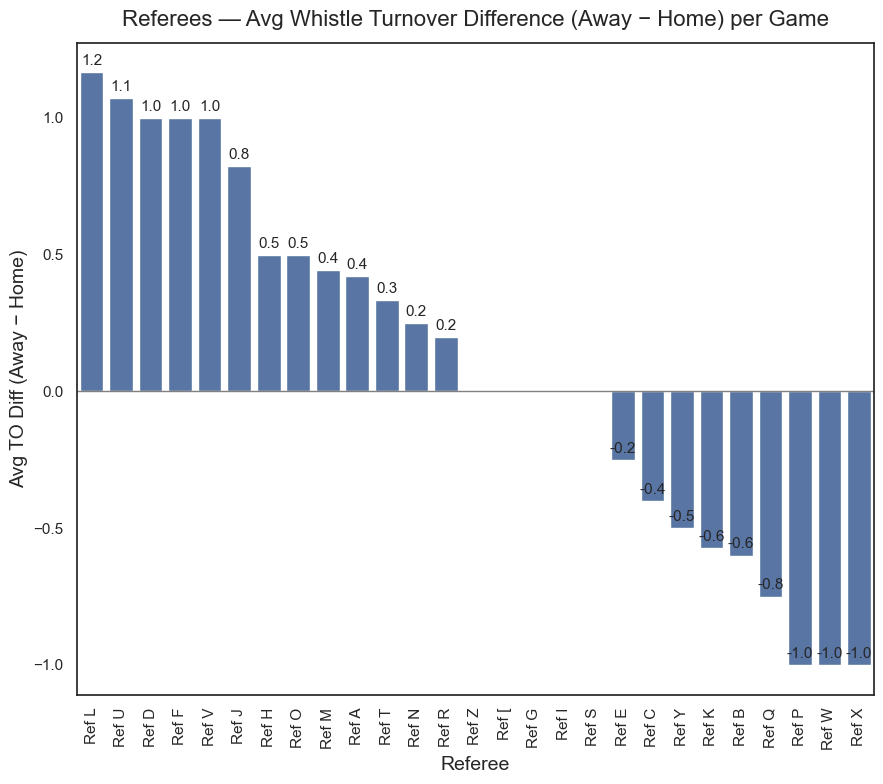

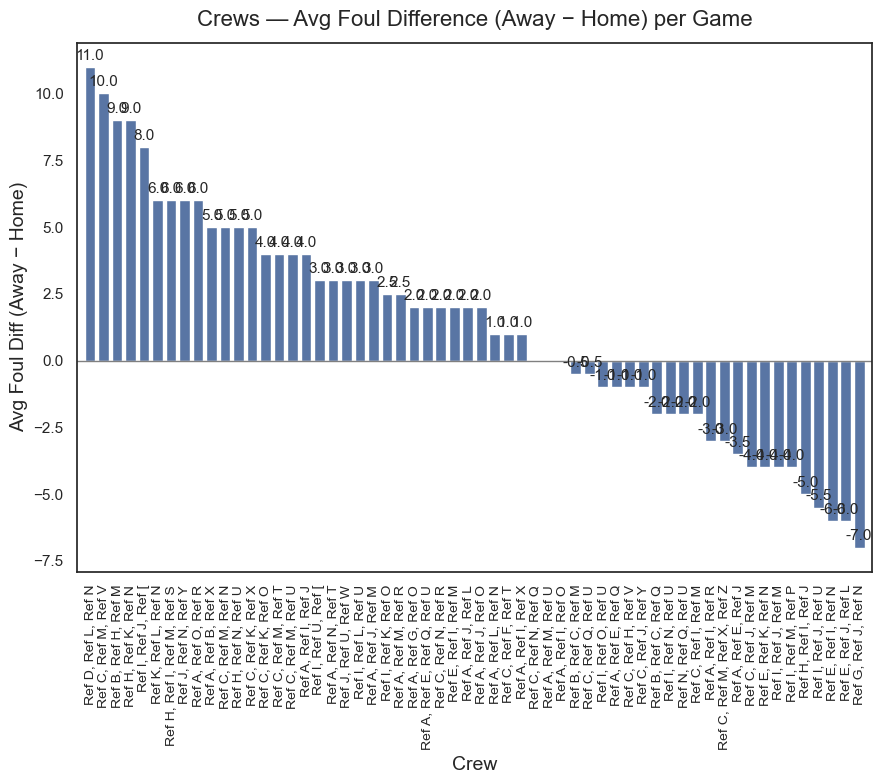

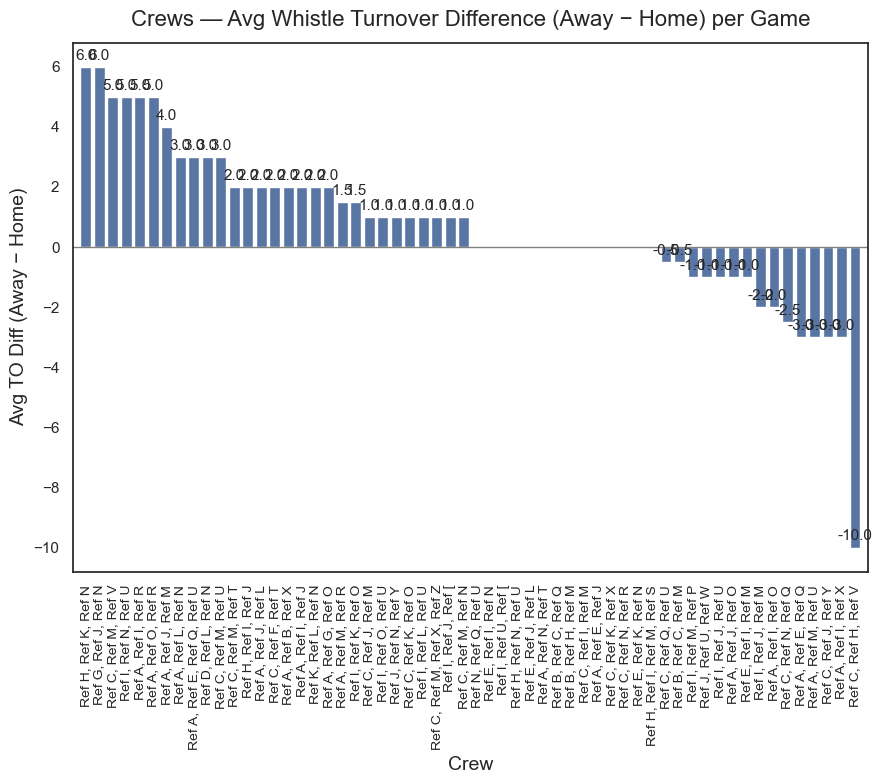

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# 1) REFEREE-LEVEL DIFFERENCES (by ref_label)

# Ensure a label exists
if "ref_label" not in referee_game_data.columns:
    referee_game_data["ref_label"] = referee_game_data["officialId"].astype(str)

have_split = all(c in referee_game_data.columns for c in ["fouls_home","fouls_away","to_home","to_away"])

if have_split:
    # Collapse to one row per (gameId, ref_label) if data are split by team
    cols_to_sum = ["fouls_home","fouls_away","to_home","to_away"]
    ref_game = (referee_game_data
                .groupby(["gameId","ref_label"], as_index=False)[cols_to_sum].sum())
    ref_game["foul_diff_game"] = ref_game["fouls_away"] - ref_game["fouls_home"]
    ref_game["to_diff_game"]   = ref_game["to_away"]    - ref_game["to_home"]
else:
    # Derive splits from team role column if needed
    role_col = "team_status" if "team_status" in referee_game_data.columns else (
               "team_role"   if "team_role"   in referee_game_data.columns else None)
    if role_col is None:
        raise ValueError("Need split cols (fouls_home/away,to_home/away) OR a role column (team_status/team_role).")

    tmp = referee_game_data[["gameId","ref_label",role_col,"fouls_made","turnovers_made"]].copy()
    pvt = tmp.pivot_table(index=["gameId","ref_label"],
                          columns=role_col,
                          values=["fouls_made","turnovers_made"],
                          aggfunc="sum",
                          fill_value=0)
    home_fouls = pvt[("fouls_made","home")] if ("fouls_made","home") in pvt.columns else 0
    away_fouls = pvt[("fouls_made","away")] if ("fouls_made","away") in pvt.columns else 0
    home_to    = pvt[("turnovers_made","home")] if ("turnovers_made","home") in pvt.columns else 0
    away_to    = pvt[("turnovers_made","away")] if ("turnovers_made","away") in pvt.columns else 0

    ref_game = pvt.reset_index()
    ref_game["foul_diff_game"] = np.array(away_fouls) - np.array(home_fouls)
    ref_game["to_diff_game"]   = np.array(away_to)    - np.array(home_to)

# Average per ref_label
ref_summary = (ref_game
               .groupby("ref_label", as_index=False)
               .agg(
                   avg_foul_diff_away_home=("foul_diff_game","mean"),
                   avg_turnover_diff_away_home=("to_diff_game","mean"),
                   games_officiated=("gameId","nunique")
               ))

# Orders for the two referee plots
ref_sorted_foul = ref_summary.sort_values("avg_foul_diff_away_home", ascending=False)
order_refs_foul = ref_sorted_foul["ref_label"].tolist()

ref_sorted_to   = ref_summary.sort_values("avg_turnover_diff_away_home", ascending=False)
order_refs_to   = ref_sorted_to["ref_label"].tolist()

# 2) CREW-LEVEL DIFFERENCES 

crew_name_col = "crew_combo" if "crew_combo" in games_with_refs.columns else (
                "crew_str"   if "crew_str"   in games_with_refs.columns else None)
if crew_name_col is None:
    games_with_refs["crew_str"] = games_with_refs["official_crew"].apply(
        lambda ids: ", ".join(map(str, sorted(ids))) if isinstance(ids, (list,tuple)) else str(ids)
    )
    crew_name_col = "crew_str"

crew_df = games_with_refs.copy()
crew_df["crew_foul_diff_game"] = crew_df["foul_count_away"] - crew_df["foul_count_home"]
crew_df["crew_to_diff_game"]   = crew_df["turnover_whistle_away"] - crew_df["turnover_whistle_home"]

crew_summary = (crew_df.groupby(crew_name_col, as_index=False)
                .agg(
                    avg_foul_diff_per_game=("crew_foul_diff_game","mean"),
                    avg_to_diff_per_game=("crew_to_diff_game","mean"),
                    games_officiated=("gameId","nunique")
                ))


crew_sorted_foul = crew_summary.sort_values("avg_foul_diff_per_game", ascending=False)
order_crews_foul = crew_sorted_foul[crew_name_col].tolist()

crew_sorted_to   = crew_summary.sort_values("avg_to_diff_per_game", ascending=False)
order_crews_to   = crew_sorted_to[crew_name_col].tolist()

# Add new calculations to the dataframes

# For referee-level: add total fouls and turnovers per game, plus home/away ratios
ref_game["total_fouls"] = ref_game["fouls_home"] + ref_game["fouls_away"]
ref_game["total_turnovers"] = ref_game["to_home"] + ref_game["to_away"]
ref_game["foul_home_ratio"] = ref_game["fouls_home"] / (ref_game["total_fouls"] + 1e-6)
ref_game["foul_away_ratio"] = ref_game["fouls_away"] / (ref_game["total_fouls"] + 1e-6)
ref_game["to_home_ratio"] = ref_game["to_home"] / (ref_game["total_turnovers"] + 1e-6)
ref_game["to_away_ratio"] = ref_game["to_away"] / (ref_game["total_turnovers"] + 1e-6)

ref_summary = (ref_game
    .groupby("ref_label", as_index=False)
    .agg(
        avg_foul_diff_away_home=("foul_diff_game","mean"),
        avg_turnover_diff_away_home=("to_diff_game","mean"),
        games_officiated=("gameId","nunique"),
        avg_total_fouls=("total_fouls","mean"),
        avg_total_turnovers=("total_turnovers","mean"),
        avg_foul_home_ratio=("foul_home_ratio","mean"),
        avg_foul_away_ratio=("foul_away_ratio","mean"),
        avg_to_home_ratio=("to_home_ratio","mean"),
        avg_to_away_ratio=("to_away_ratio","mean")
    ))

# For crew-level: add total fouls and turnovers per game, plus home/away ratios
crew_df["crew_total_fouls"] = crew_df["foul_count_home"] + crew_df["foul_count_away"]
crew_df["crew_total_turnovers"] = crew_df["turnover_whistle_home"] + crew_df["turnover_whistle_away"]
crew_df["crew_foul_home_ratio"] = crew_df["foul_count_home"] / (crew_df["crew_total_fouls"] + 1e-6)
crew_df["crew_foul_away_ratio"] = crew_df["foul_count_away"] / (crew_df["crew_total_fouls"] + 1e-6)
crew_df["crew_to_home_ratio"] = crew_df["turnover_whistle_home"] / (crew_df["crew_total_turnovers"] + 1e-6)
crew_df["crew_to_away_ratio"] = crew_df["turnover_whistle_away"] / (crew_df["crew_total_turnovers"] + 1e-6)

crew_summary = (crew_df.groupby(crew_name_col, as_index=False)
    .agg(
        avg_foul_diff_per_game=("crew_foul_diff_game","mean"),
        avg_to_diff_per_game=("crew_to_diff_game","mean"),
        games_officiated=("gameId","nunique"),
        avg_total_fouls=("crew_total_fouls","mean"),
        avg_total_turnovers=("crew_total_turnovers","mean"),
        avg_foul_home_ratio=("crew_foul_home_ratio","mean"),
        avg_foul_away_ratio=("crew_foul_away_ratio","mean"),
        avg_to_home_ratio=("crew_to_home_ratio","mean"),
        avg_to_away_ratio=("crew_to_away_ratio","mean")
    ))

def add_bar_labels(ax, fmt="{:.1f}"):
        for p in ax.patches:
            val = p.get_height()
            if val != 0:
                ax.annotate(fmt.format(val),
                            (p.get_x() + p.get_width() / 2, val),
                            ha='center', va='bottom', fontsize=11, xytext=(0, 3),
                            textcoords='offset points')
# --- Referee plots ---

# (A) Refs: Avg Foul Diff (Away − Home) — sorted DESC (vertical)
plt.figure(figsize=(9, 8))
ax1 = sns.barplot(data=ref_sorted_foul, x="ref_label", y="avg_foul_diff_away_home", order=order_refs_foul)
ax1.axhline(0, lw=1, color="gray")
ax1.set_title("Referees — Avg Foul Difference (Away − Home) per Game", fontsize=16, pad=12)
ax1.set_xlabel("Referee", fontsize=14)
ax1.set_ylabel("Avg Foul Diff (Away − Home)", fontsize=14)
ax1.tick_params(axis="x", rotation=90, labelsize=11)
add_bar_labels(ax1)
plt.tight_layout()
plt.show()

# (B) Refs: Avg Whistle TO Diff (Away − Home) — sorted DESC (vertical)
plt.figure(figsize=(9, 8))
ax2 = sns.barplot(data=ref_sorted_to, x="ref_label", y="avg_turnover_diff_away_home", order=order_refs_to)
ax2.axhline(0, lw=1, color="gray")
ax2.set_title("Referees — Avg Whistle Turnover Difference (Away − Home) per Game", fontsize=16, pad=12)
ax2.set_xlabel("Referee", fontsize=14)
ax2.set_ylabel("Avg TO Diff (Away − Home)", fontsize=14)
ax2.tick_params(axis="x", rotation=90, labelsize=11)
add_bar_labels(ax2)
plt.tight_layout()
plt.show()

# --- Crew plots ---

# Crews: Avg Foul Diff — ALL crews
plt.figure(figsize=(9, 8))
ax3 = sns.barplot(data=crew_sorted_foul, x=crew_name_col, y="avg_foul_diff_per_game", order=order_crews_foul)
ax3.axhline(0, lw=1, color="gray")
ax3.set_title("Crews — Avg Foul Difference (Away − Home) per Game", fontsize=16, pad=12)
ax3.set_xlabel("Crew", fontsize=14)
ax3.set_ylabel("Avg Foul Diff (Away − Home)", fontsize=14)
ax3.tick_params(axis="x", rotation=90, labelsize=10)
ax3.margins(x=0.01)
add_bar_labels(ax3)
plt.tight_layout()
plt.show()

# Crews: Avg Whistle TO Diff — ALL crews
plt.figure(figsize=(9, 8))
ax4 = sns.barplot(data=crew_sorted_to, x=crew_name_col, y="avg_to_diff_per_game", order=order_crews_to)
ax4.axhline(0, lw=1, color="gray")
ax4.set_title("Crews — Avg Whistle Turnover Difference (Away − Home) per Game", fontsize=16, pad=12)
ax4.set_xlabel("Crew", fontsize=14)
ax4.set_ylabel("Avg TO Diff (Away − Home)", fontsize=14)
ax4.tick_params(axis="x", rotation=90, labelsize=10)
ax4.margins(x=0.01)
add_bar_labels(ax4)
plt.tight_layout()
plt.show()

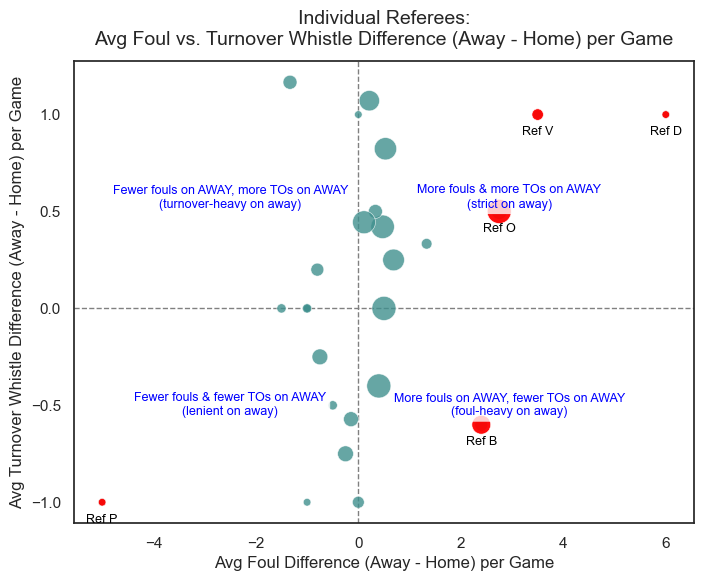

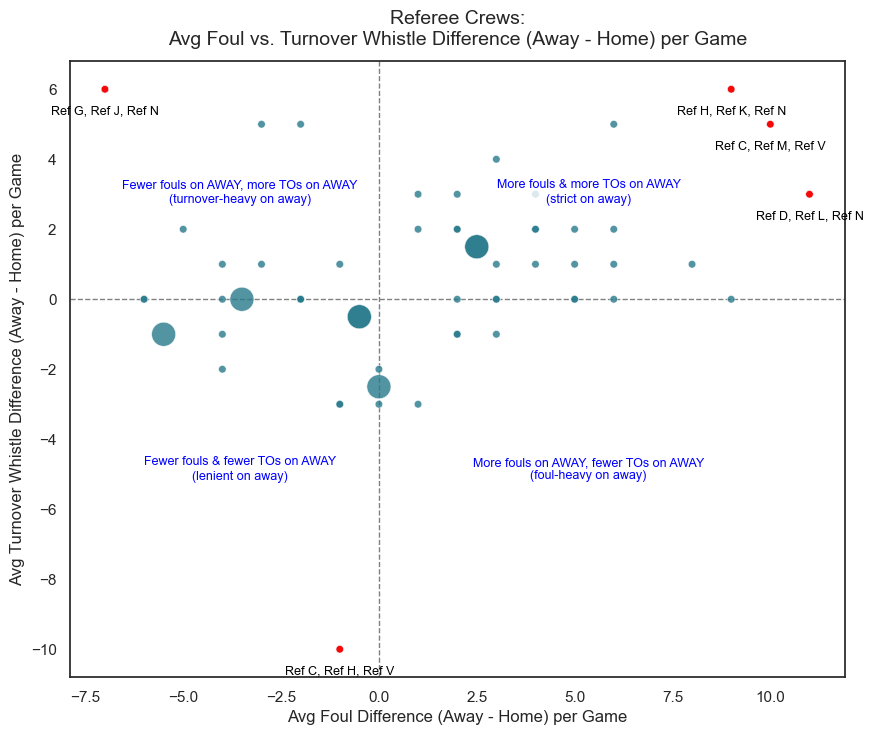

In [254]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
palette = sns.color_palette("crest")
COLOR_OUTLIER = "red"

# ---------- helpers ----------
def get_outliers(df, x_col, y_col, n=10, center=(0.0, 0.0)):
    """Return top-n farthest points from `center` (default neutral 0,0)."""
    c = np.array(center, dtype=float)
    pts = df[[x_col, y_col]].to_numpy(dtype=float)
    dist = np.linalg.norm(pts - c, axis=1)
    return df.iloc[dist.argsort()[-n:]]

def annotate_quadrants(ax, x0=0.0, y0=0.0, color="blue", fx=0.45, fy=0.45, fs=9):
    """Place quadrant labels inside each quadrant, relative to (x0,y0)."""
    ax.axvline(x0, ls="--", lw=1, color="gray", zorder=0)
    ax.axhline(y0, ls="--", lw=1, color="gray", zorder=0)

    xlo, xhi = ax.get_xlim(); ylo, yhi = ax.get_ylim()
    xR = x0 + fx*(xhi - x0); xL = x0 - fx*(x0 - xlo)
    yT = y0 + fy*(yhi - y0); yB = y0 - fy*(y0 - ylo)

    box = dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8)
    ax.text(xR, yT, "More fouls & more TOs on AWAY\n(strict on away)",
            ha="center", va="center", fontsize=fs, color=color, bbox=box, clip_on=False)
    ax.text(xL, yT, "Fewer fouls on AWAY, more TOs on AWAY\n(turnover-heavy on away)",
            ha="center", va="center", fontsize=fs, color=color, bbox=box, clip_on=False)
    ax.text(xR, yB, "More fouls on AWAY, fewer TOs on AWAY\n(foul-heavy on away)",
            ha="center", va="center", fontsize=fs, color=color, bbox=box, clip_on=False)
    ax.text(xL, yB, "Fewer fouls & fewer TOs on AWAY\n(lenient on away)",
            ha="center", va="center", fontsize=fs, color=color, bbox=box, clip_on=False)

def label_outliers(ax, df, x_col, y_col, id_col, dx_frac=0.00, dy_frac=0.02, color="black", fs=9):
    """Label points just BELOW each outlier dot (axis-relative offset)."""
    xlo, xhi = ax.get_xlim(); ylo, yhi = ax.get_ylim()
    dx = dx_frac * (xhi - xlo); dy = dy_frac * (yhi - ylo)
    for _, r in df.iterrows():
        ax.text(r[x_col] + dx, r[y_col] - dy, str(r[id_col]),
                ha="center", va="top", fontsize=fs, color=color, clip_on=False)

# --------------- INDIVIDUAL REFEREES ---------------
out_refs = get_outliers(ref_summary,
                        'avg_foul_diff_away_home',
                        'avg_turnover_diff_away_home',
                        n=5, center=(0.0, 0.0))

plt.figure(figsize=(8,6))
sns.scatterplot(data=ref_summary,
                x='avg_foul_diff_away_home', y='avg_turnover_diff_away_home',
                size='games_officiated', sizes=(30, 300),
                alpha=0.8, color=palette[2], legend=False)
sns.scatterplot(data=out_refs,
                x='avg_foul_diff_away_home', y='avg_turnover_diff_away_home',
                size='games_officiated', sizes=(30, 300),
                alpha=0.95, color=COLOR_OUTLIER, legend=False)

annotate_quadrants(plt.gca(), x0=0.0, y0=0.0, fx=0.45, fy=0.45, fs=9)
label_outliers(plt.gca(), out_refs,
               'avg_foul_diff_away_home', 'avg_turnover_diff_away_home',
               'ref_label', dy_frac=0.025, fs=9)

plt.title('Individual Referees:\nAvg Foul vs. Turnover Whistle Difference (Away - Home) per Game',
          fontsize=14, pad=12)
plt.xlabel('Avg Foul Difference (Away - Home) per Game', fontsize=12)
plt.ylabel('Avg Turnover Whistle Difference (Away - Home) per Game', fontsize=12)
plt.grid(False)
plt.show()

# ---------------- REFEREE CREWS ----------------
out_crews = get_outliers(crew_summary,
                         'avg_foul_diff_per_game', 'avg_to_diff_per_game',
                         n=5, center=(0.0, 0.0))

plt.figure(figsize=(10,8))
sns.scatterplot(data=crew_summary,
                x='avg_foul_diff_per_game', y='avg_to_diff_per_game',
                size='games_officiated', sizes=(30, 300),
                alpha=0.8, color=palette[3], legend=False)
sns.scatterplot(data=out_crews,
                x='avg_foul_diff_per_game', y='avg_to_diff_per_game',
                size='games_officiated', sizes=(30, 300),
                alpha=0.95, color=COLOR_OUTLIER, legend=False)

annotate_quadrants(plt.gca(), x0=0.0, y0=0.0, fx=0.45, fy=0.45, fs=9)
label_outliers(plt.gca(), out_crews,
               'avg_foul_diff_per_game', 'avg_to_diff_per_game',
               crew_name_col, dy_frac=0.025, fs=9)

plt.title('Referee Crews:\nAvg Foul vs. Turnover Whistle Difference (Away - Home) per Game',
          fontsize=14, pad=12)
plt.xlabel('Avg Foul Difference (Away - Home) per Game', fontsize=12)
plt.ylabel('Avg Turnover Whistle Difference (Away - Home) per Game', fontsize=12)
plt.grid(False)
plt.show()

c:\Users\amyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\amyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\amyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\amyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

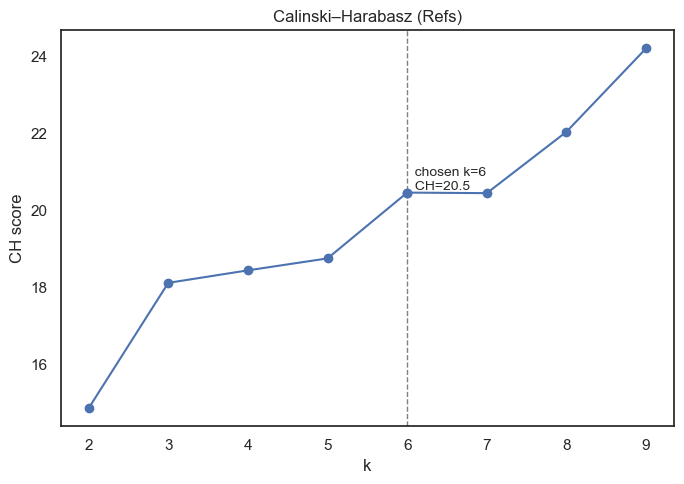

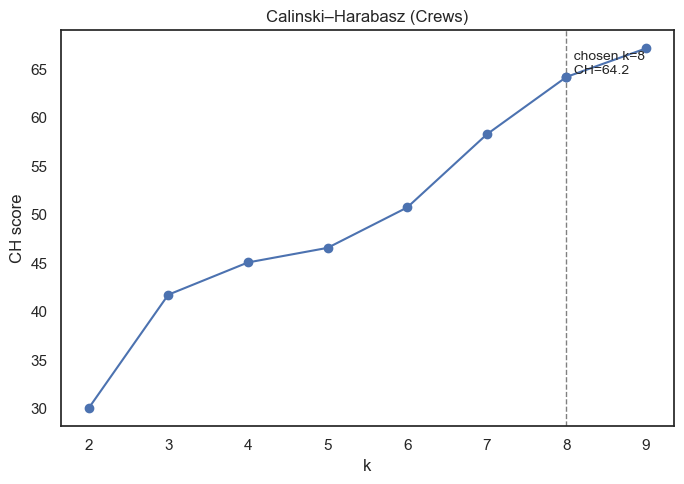

c:\Users\amyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


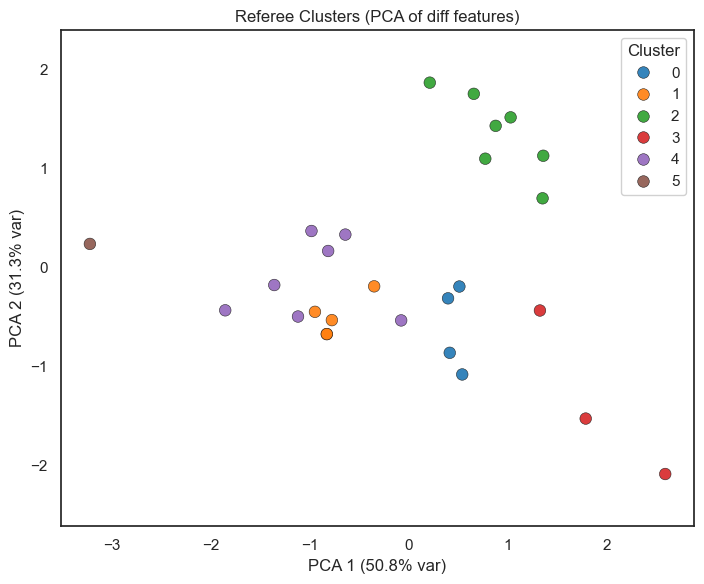

[REF] chosen k: 6 | silhouette: 0.376


c:\Users\amyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


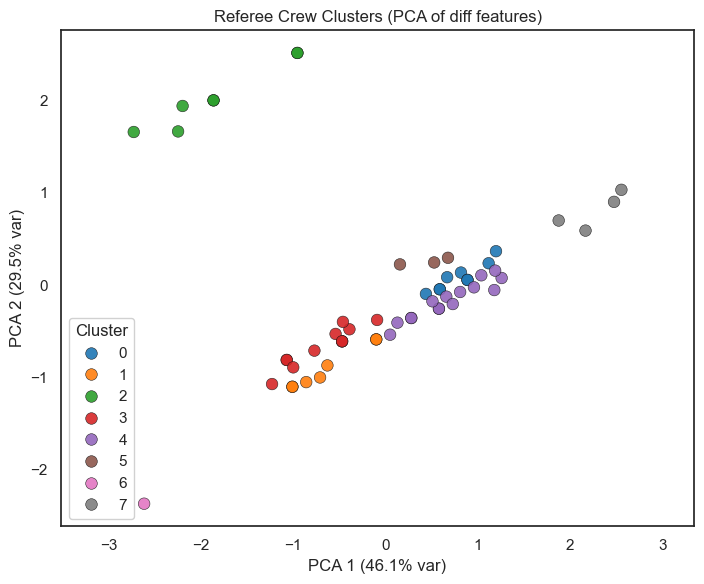

[CREW] chosen k: 8 | silhouette: 0.442


In [260]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

# Refs  ----- features and clustering
ref_features = ref_summary[['ref_label',
                            'avg_foul_diff_away_home',
                            'avg_turnover_diff_away_home',
                            'games_officiated']].copy()
ref_X = ref_features[['avg_foul_diff_away_home',
                      'avg_turnover_diff_away_home',
                      'games_officiated']].fillna(0.0)
ref_X_scaled = StandardScaler().fit_transform(ref_X)
 
# Crews ----- features and clustering
crew_label_col = 'crew_combo' if 'crew_combo' in crew_summary.columns else 'crew_str'
crew_features = crew_summary[[crew_label_col,
                              'avg_foul_diff_per_game',
                              'avg_to_diff_per_game',
                              'games_officiated']].copy()
crew_X = crew_features[['avg_foul_diff_per_game',
                        'avg_to_diff_per_game',
                        'games_officiated']].fillna(0.0)
crew_X_scaled = StandardScaler().fit_transform(crew_X)

k_grid = list(range(2, 10))

# Refs ---- - Calinski-Harabasz scores
ref_scores = []
for k in k_grid:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    lbl = km.fit_predict(ref_X_scaled)
    ref_scores.append(calinski_harabasz_score(ref_X_scaled, lbl))

# Crews ---- - Calinski-Harabasz scores
crew_scores = []
for k in k_grid:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    lbl = km.fit_predict(crew_X_scaled)
    crew_scores.append(calinski_harabasz_score(crew_X_scaled, lbl))


# Plot CH curves as individual plots
chosen_k_ref  = 6
chosen_k_crew = 8

# Calinski–Harabasz (Refs)
plt.figure(figsize=(7, 5))
plt.plot(k_grid, ref_scores, marker='o')
ref_ch_at_choice = ref_scores[k_grid.index(chosen_k_ref)]
plt.axvline(chosen_k_ref, ls='--', lw=1, color='gray')
plt.scatter([chosen_k_ref], [ref_ch_at_choice], zorder=3)
plt.text(chosen_k_ref, ref_ch_at_choice,
         f'  chosen k={chosen_k_ref}\n  CH={ref_ch_at_choice:.1f}',
         va='bottom', ha='left', fontsize=10)
plt.title('Calinski–Harabasz (Refs)')
plt.xlabel('k'); plt.ylabel('CH score'); plt.grid(False)
plt.tight_layout(); plt.show()

# Calinski–Harabasz (Crews)
plt.figure(figsize=(7, 5))
plt.plot(k_grid, crew_scores, marker='o')
crew_ch_at_choice = crew_scores[k_grid.index(chosen_k_crew)]
plt.axvline(chosen_k_crew, ls='--', lw=1, color='gray')
plt.scatter([chosen_k_crew], [crew_ch_at_choice], zorder=3)
plt.text(chosen_k_crew, crew_ch_at_choice,
         f'  chosen k={chosen_k_crew}\n  CH={crew_ch_at_choice:.1f}',
         va='bottom', ha='left', fontsize=10)
plt.title('Calinski–Harabasz (Crews)')
plt.xlabel('k'); plt.ylabel('CH score'); plt.grid(False)
plt.tight_layout(); plt.show()


# Individual Referees --- KMeans clustering
km_ref = KMeans(n_clusters=chosen_k_ref, random_state=42, n_init=20)
ref_features['cluster'] = km_ref.fit_predict(ref_X_scaled)

pca_ref = PCA(n_components=2, random_state=42)
ref_pca = pca_ref.fit_transform(ref_X_scaled)
v1, v2 = pca_ref.explained_variance_ratio_ * 100

plt.figure(figsize=(7.2, 6))
ax = sns.scatterplot(x=ref_pca[:,0], y=ref_pca[:,1],
                     hue=ref_features['cluster'], palette="tab10",
                     alpha=0.9, s=70, edgecolor="k", linewidth=0.4, legend=True)
ax.set_title("Referee Clusters (PCA of diff features)")
ax.set_xlabel(f"PCA 1 ({v1:.1f}% var)")
ax.set_ylabel(f"PCA 2 ({v2:.1f}% var)")
ax.grid(False); ax.set_aspect("equal", adjustable="datalim")
ax.legend(title="Cluster", loc="best", frameon=True, framealpha=0.9)
plt.tight_layout(); plt.show()
sil_ref = silhouette_score(ref_X_scaled, ref_features['cluster'])
print(f"[REF] chosen k: {chosen_k_ref} | silhouette: {sil_ref:.3f}")



# Crews --- KMeans clustering
km_crew = KMeans(n_clusters=chosen_k_crew, random_state=42, n_init=20)
crew_features['cluster'] = km_crew.fit_predict(crew_X_scaled)

pca_crew = PCA(n_components=2, random_state=42)
crew_pca = pca_crew.fit_transform(crew_X_scaled)
cv1, cv2 = pca_crew.explained_variance_ratio_ * 100

plt.figure(figsize=(7.2, 6))
ax = sns.scatterplot(x=crew_pca[:,0], y=crew_pca[:,1],
                     hue=crew_features['cluster'], palette="tab10",
                     alpha=0.9, s=70, edgecolor="k", linewidth=0.4, legend=True)
ax.set_title("Referee Crew Clusters (PCA of diff features)")
ax.set_xlabel(f"PCA 1 ({cv1:.1f}% var)")
ax.set_ylabel(f"PCA 2 ({cv2:.1f}% var)")
ax.grid(False); ax.set_aspect("equal", adjustable="datalim")
ax.legend(title="Cluster", loc="best", frameon=True, framealpha=0.9)
plt.tight_layout(); plt.show()

sil_crew = silhouette_score(crew_X_scaled, crew_features['cluster'])
print(f"[CREW] chosen k: {chosen_k_crew} | silhouette: {sil_crew:.3f}")

In [261]:
import pandas as pd
import numpy as np

# ---- PCA loadings (how each original feature contributes to PC axes)
def print_loadings(pca, feature_names, title):
    L = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(pca.n_components_)])
    exp = (pca.explained_variance_ratio_ * 100).round(1)
    print(f"\n{title} loadings (% var: {list(exp)})")
    print(L.round(3))

print_loadings(pca_ref, ['avg_foul_diff_away_home','avg_turnover_diff_away_home','games_officiated'],
               "REF PCA")
print_loadings(pca_crew, ['avg_foul_diff_per_game','avg_to_diff_per_game','games_officiated'],
               "CREW PCA")

# ---- Per-cluster means and sizes (REFS)
ref_cluster_summary = (
    ref_features
    .groupby('cluster', as_index=False)[['avg_foul_diff_away_home','avg_turnover_diff_away_home','games_officiated']]
    .mean()
    .assign(n=lambda d: ref_features.groupby('cluster').size().values)
    .sort_values('cluster')
)
print("\nReferee clusters — feature means and sizes")
print(ref_cluster_summary.round(3))

# ---- Per-cluster means and sizes (CREWS)
crew_cluster_summary = (
    crew_features
    .groupby('cluster', as_index=False)[['avg_foul_diff_per_game','avg_to_diff_per_game','games_officiated']]
    .mean()
    .assign(n=lambda d: crew_features.groupby('cluster').size().values)
    .sort_values('cluster')
)
print("\nCrew clusters — feature means and sizes")
print(crew_cluster_summary.round(3))


REF PCA loadings (% var: [np.float64(50.8), np.float64(31.3)])
     avg_foul_diff_away_home  avg_turnover_diff_away_home  games_officiated
PC1                    0.653                        0.677             0.339
PC2                   -0.320                       -0.158             0.934

CREW PCA loadings (% var: [np.float64(46.1), np.float64(29.5)])
     avg_foul_diff_per_game  avg_to_diff_per_game  games_officiated
PC1                   0.633                 0.599            -0.489
PC2                   0.213                 0.473             0.855

Referee clusters — feature means and sizes
   cluster  avg_foul_diff_away_home  avg_turnover_diff_away_home  \
0        0                    0.083                        0.750   
1        1                   -1.060                        0.040   
2        2                    0.417                        0.373   
3        3                    4.083                        0.833   
4        4                   -0.035                    